In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [70]:
sales = pd.read_csv("C:/Users/KIIT/Downloads/train_v9rqX0R.csv")

In [22]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [5]:
sales.shape

(8523, 12)

In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Age
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.710428,0.066132,140.992782,1997.831867,2181.288914,15.168133
std,4.238481,0.051598,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.000000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400,9.000000
50%,12.000000,0.053931,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [8]:
sales.groupby('Outlet_Size').count()['Item_Identifier']

Outlet_Size
High       932
Medium    2793
Small     2388
Name: Item_Identifier, dtype: int64

In [11]:
sales['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
sales['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [13]:
sales['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [71]:
sales['Item_Weight'].fillna(12,inplace=True)

In [72]:
sales['Outlet_Size'].fillna('Medium',inplace=True)

In [73]:
sales['Age'] = 2013 - sales['Outlet_Establishment_Year']

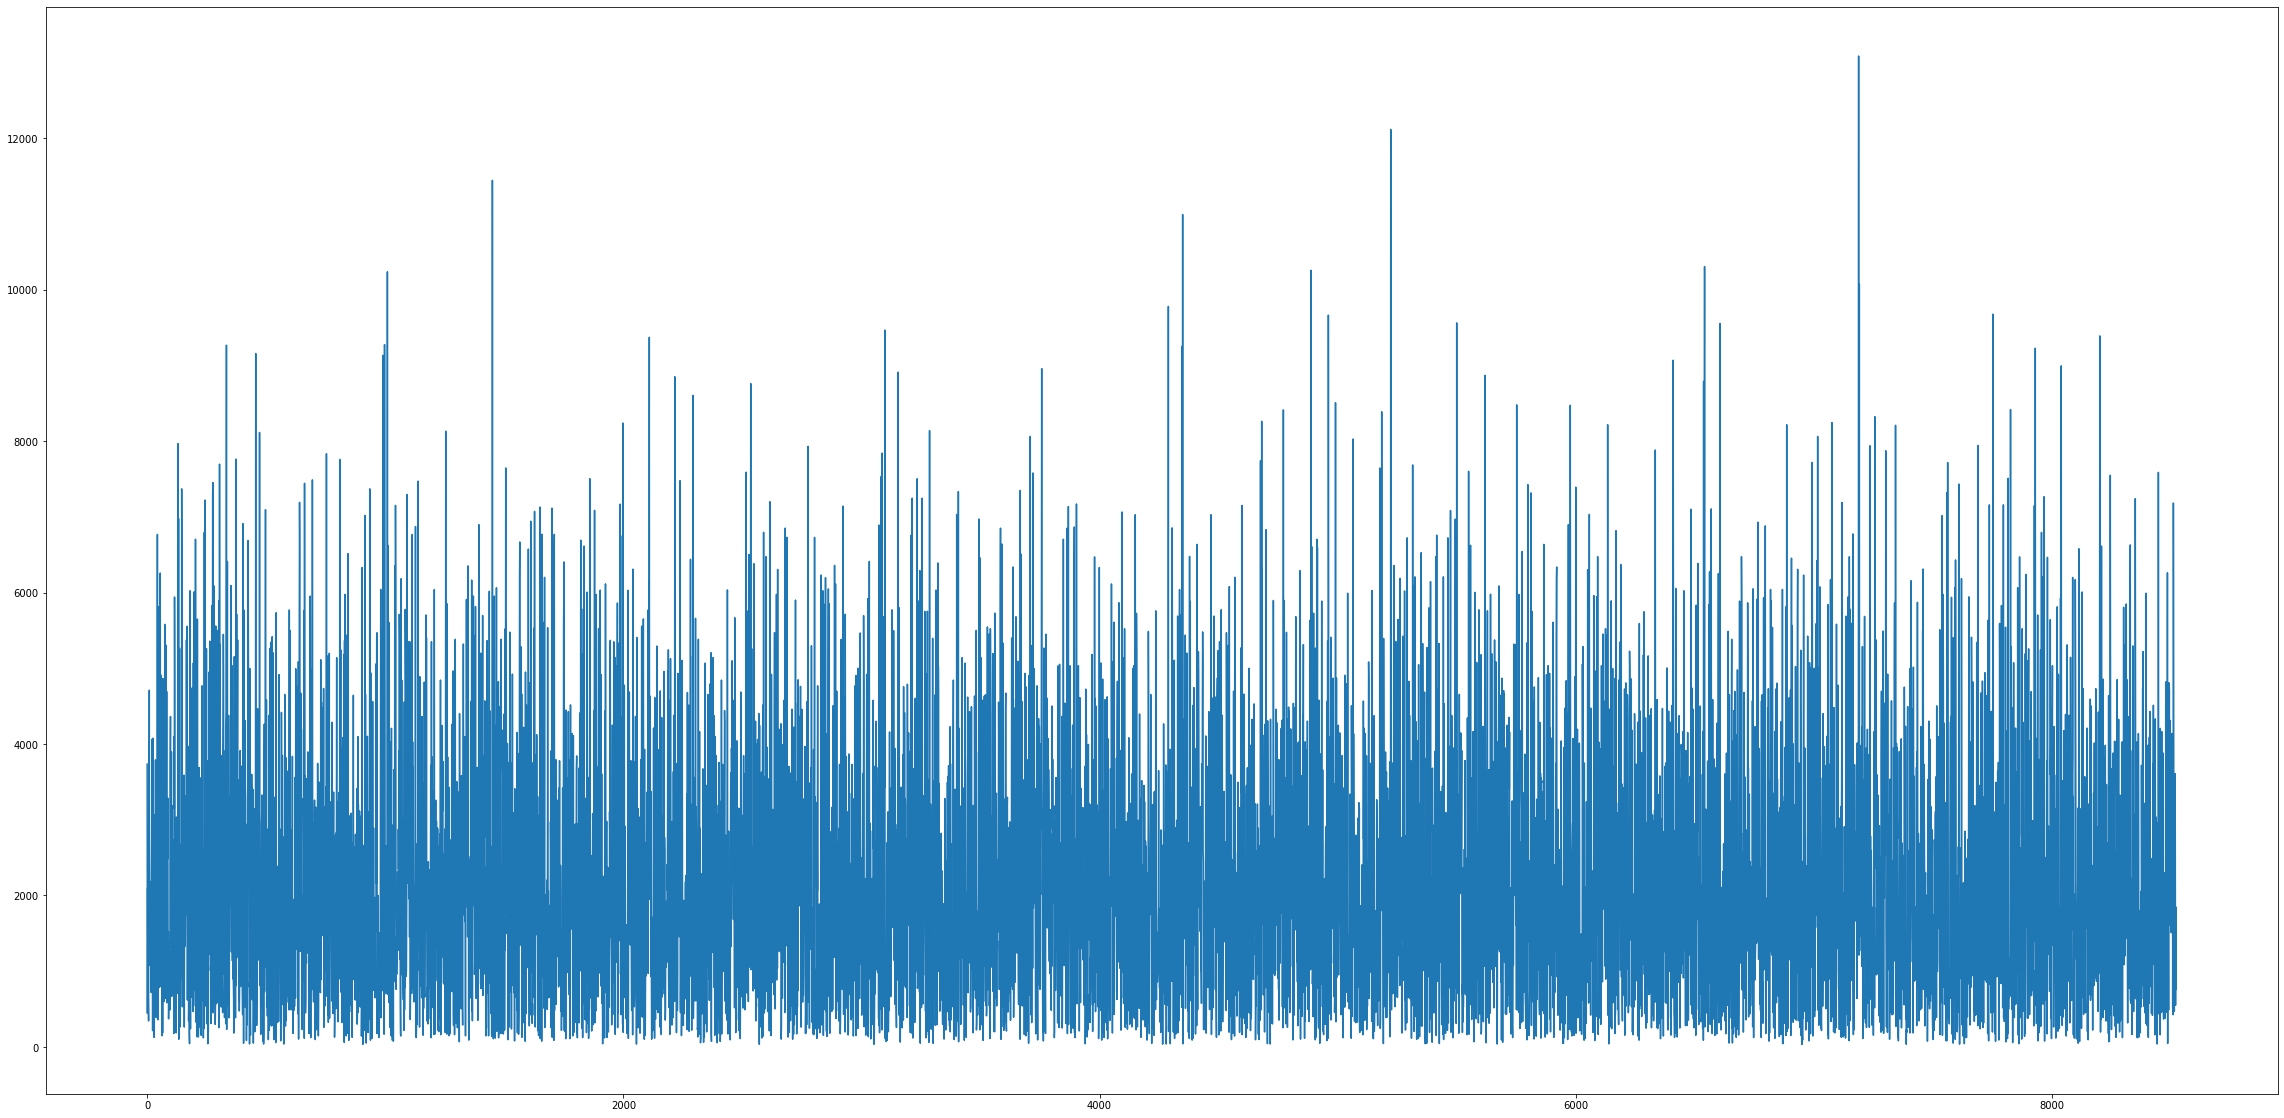

In [30]:
sales['Item_Outlet_Sales'].plot(figsize=(40,20))

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pylab

In [32]:
def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
def log_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
def reciprocal_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    

def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))
    

def exponential_master(data,col,e):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col]**e)
    
    plt.subplot(1,3,2)
    stats.probplot(data[col]**e,dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col]**e)
    
def boxcox_master(data, col):
    plt.figure(figsize=(16, 4))
    plt.tight_layout()

    z,param=stats.boxcox(data[col])
    
    plt.subplot(1, 3, 1)
    sns.distplot(z, bins=30)
    plt.title('Box-Cox Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(z, dist="norm", plot=pylab)
    plt.ylabel('Box-Cox RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=z)
    plt.title('Box-Cox Boxplot')


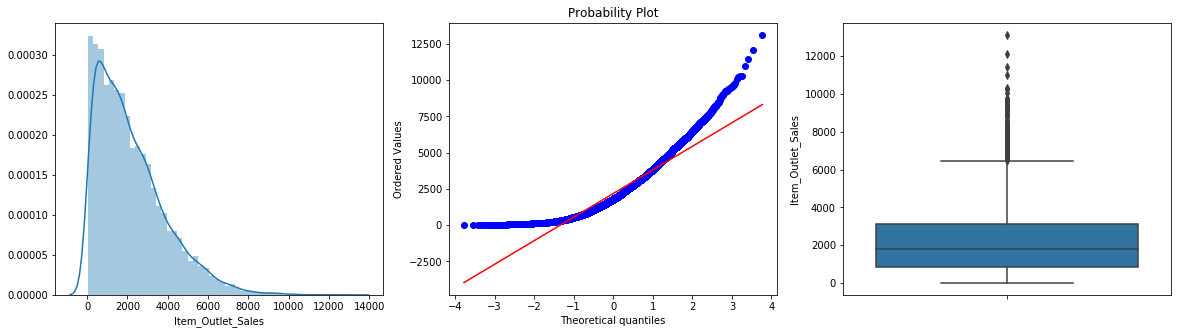

In [37]:
masterplot(sales,'Item_Outlet_Sales')

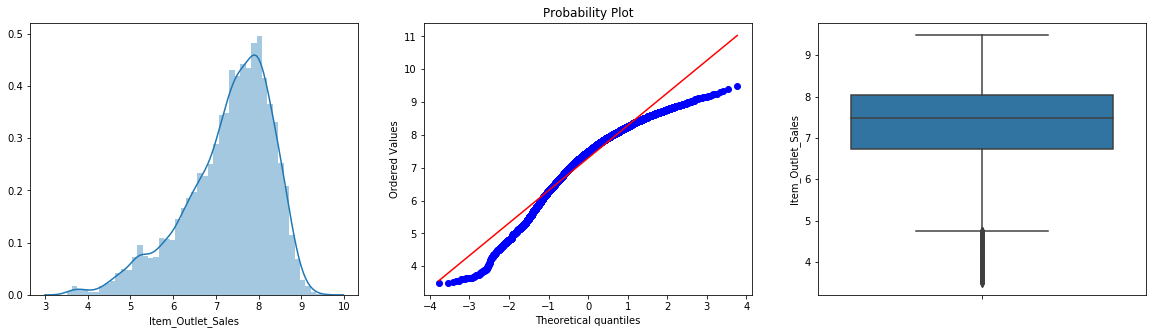

In [38]:
log_master(sales,'Item_Outlet_Sales')

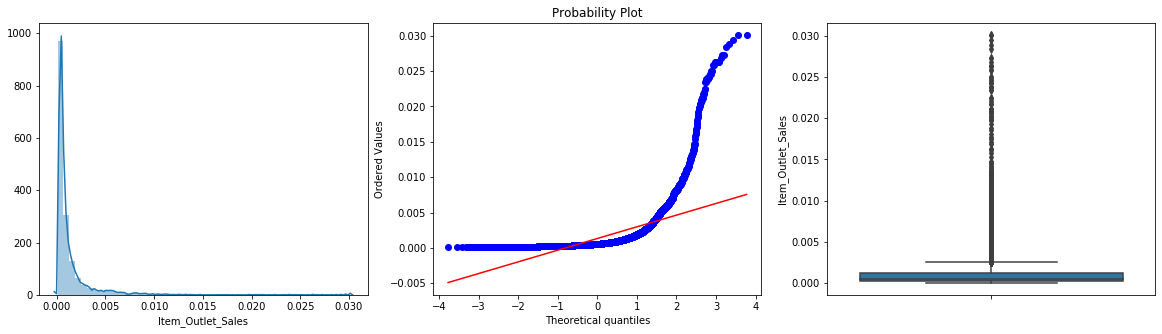

In [39]:
reciprocal_master(sales,'Item_Outlet_Sales')

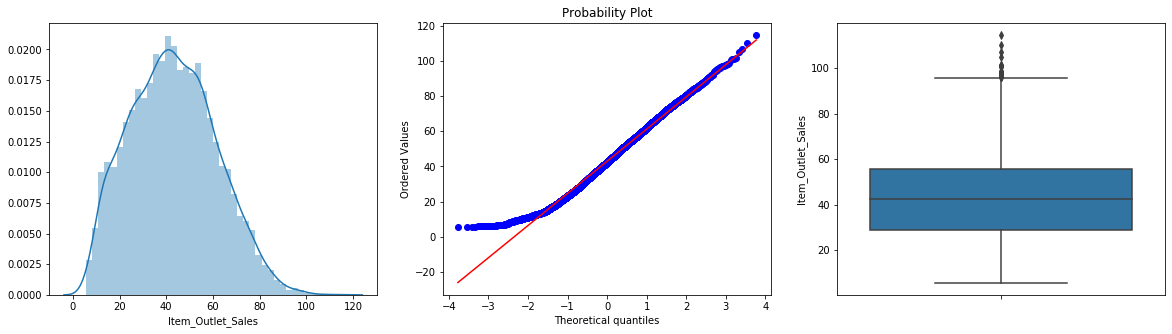

In [40]:
squareroot_master(sales,'Item_Outlet_Sales')

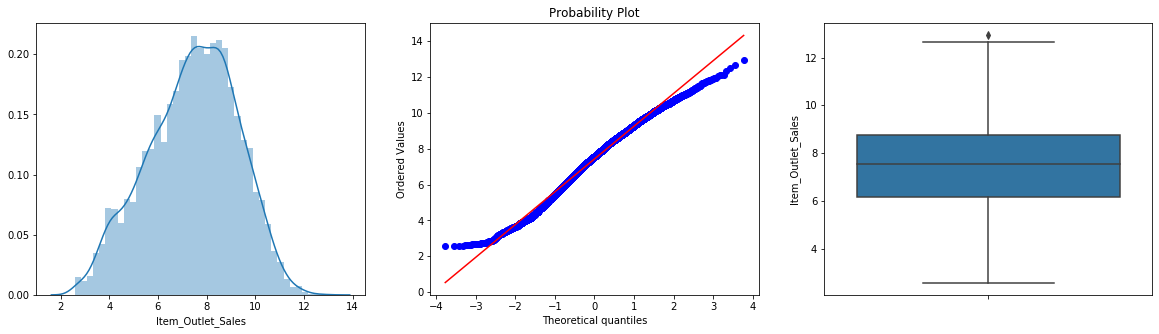

In [57]:
exponential_master(sales,'Item_Outlet_Sales',0.27)

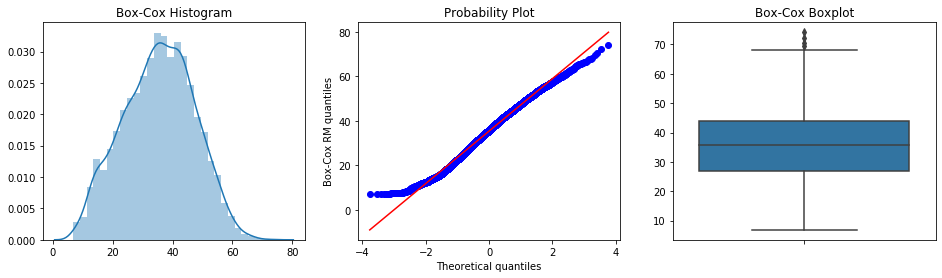

In [56]:
boxcox_master(sales,'Item_Outlet_Sales')

In [74]:
sales['Item_Outlet_Sales'] = sales['Item_Outlet_Sales']**0.27

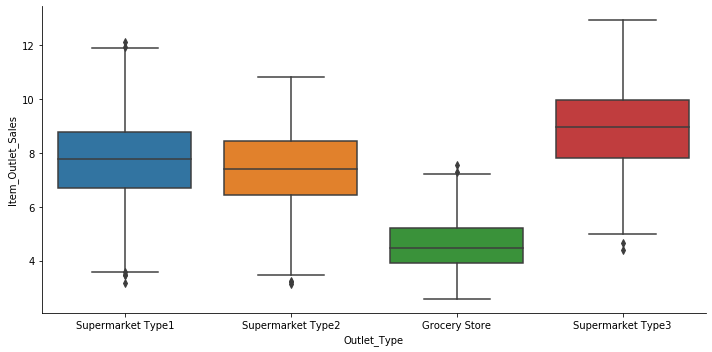

In [59]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',kind='box',data=sales,height=5,aspect=2)

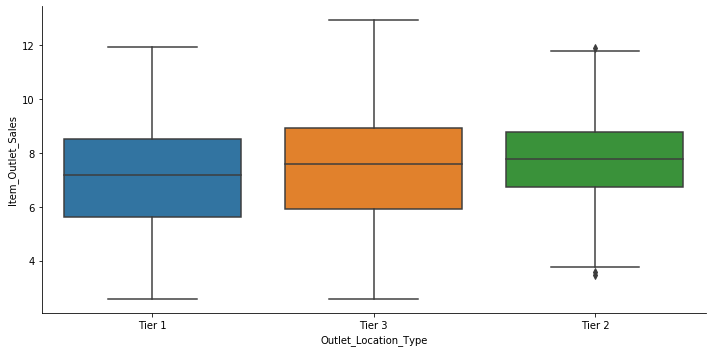

In [60]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',kind='box',data=sales,height=5,aspect=2)

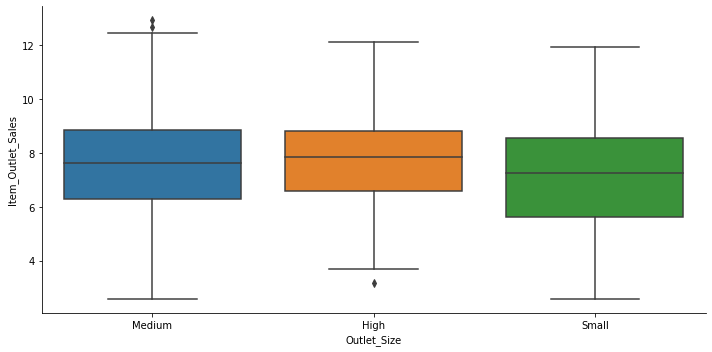

In [61]:
sns.catplot(x='Outlet_Size',y='Item_Outlet_Sales',kind='box',data=sales,height=5,aspect=2)

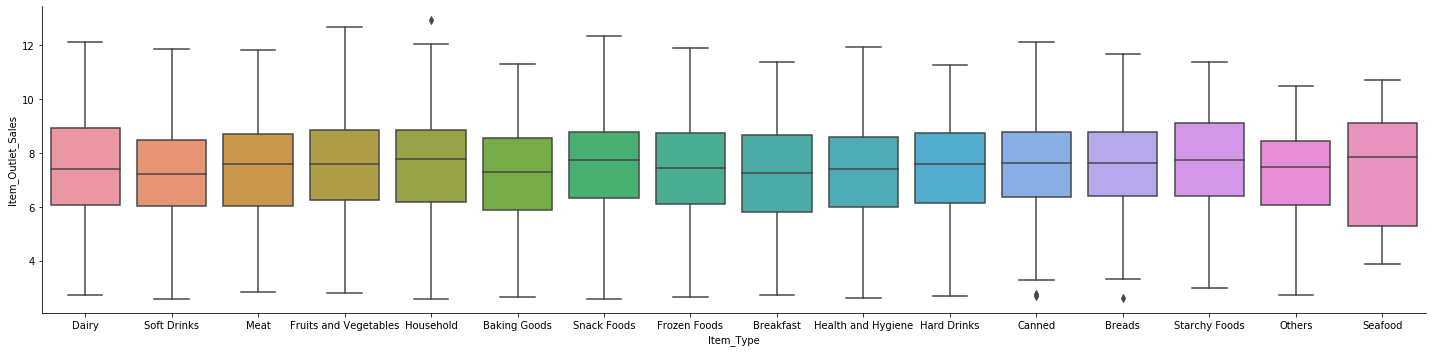

In [64]:
sns.catplot(x='Item_Type',y='Item_Outlet_Sales',kind='box',data=sales,height=5,aspect=4)

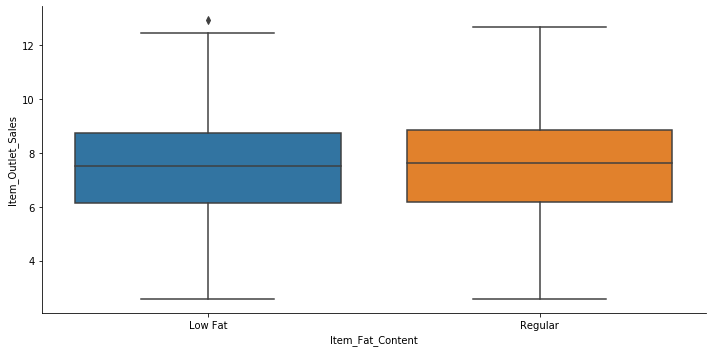

In [79]:
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',kind='box',data=sales,height=5,aspect=2)

In [76]:
sales['Item_Fat_Content'].replace('low fat','Low Fat',inplace=True)

In [78]:
sales['Item_Fat_Content'].replace('LF','Low Fat',inplace=True)
sales['Item_Fat_Content'].replace('reg','Regular',inplace=True)

In [80]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
sales['Item_Fat_Content']= label_encoder.fit_transform(sales['Item_Fat_Content'])
sales['Outlet_Size']= label_encoder.fit_transform(sales['Outlet_Size'])

In [82]:
sales['Outlet_Location_Type']= label_encoder.fit_transform(sales['Outlet_Location_Type'])

In [81]:
one_hot_features = ['Item_Type','Outlet_Type']

one_hot_encoded = pd.get_dummies(sales[one_hot_features])

sales = sales.drop(one_hot_features, axis=1)


sales = pd.concat([sales, one_hot_encoded], axis=1)
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,249.8092,OUT049,1999,1,Tier 1,9.215583,...,0,0,0,0,0,0,0,1,0,0
1,DRC01,5.92,1,0.019278,48.2692,OUT018,2009,1,Tier 3,5.183712,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,OUT049,1999,1,Tier 1,7.885817,...,1,0,0,0,0,0,0,1,0,0
3,FDX07,19.20,1,0.000000,182.0950,OUT010,1998,1,Tier 3,5.935794,...,0,0,0,0,0,0,1,0,0,0
4,NCD19,8.93,0,0.000000,53.8614,OUT013,1987,0,Tier 3,6.447294,...,0,0,0,0,0,0,0,1,0,0


In [85]:
sales.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Age,Item_Type_Baking Goods,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1,0,9.215583,14,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,2,5.183712,4,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,0,7.885817,14,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,1,2,5.935794,15,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,1987,0,2,6.447294,26,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
sales.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
training, testing = train_test_split(sales, test_size=0.2, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(sales.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 8523; training sample size = 6818, testing sample size = 1705


In [89]:
df_train_s = training.loc[:,sales.columns]
X_train = sales.drop(['Item_Outlet_Sales'], axis=1)
Y_train = sales.loc[:, ['Item_Outlet_Sales']]

df_test_s = testing.loc[:,sales.columns]
X_test = df_test_s.drop(['Item_Outlet_Sales'], axis=1)
Y_test = df_test_s.loc[:, ['Item_Outlet_Sales']]

In [96]:
X_train.shape

(8523, 28)

In [90]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,Y_train)
l.predict(X_test)

array([[ 8.05273438],
       [ 7.66601562],
       [ 7.59960938],
       ...,
       [ 9.58398438],
       [ 3.1484375 ],
       [10.63378906]])

In [91]:
from sklearn.metrics import mean_squared_error
December_predictions = l.predict(X_test)
mse = mean_squared_error(Y_test,December_predictions)
rmse = np.sqrt(mse)
rmse

1.0417150018893564

In [92]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,December_predictions)
r2

0.6873002556116601

In [93]:
from sklearn.linear_model import Ridge
r = Ridge()
r.fit(X_train,Y_train)
r.predict(X_test)

array([[ 8.05290026],
       [ 7.66456493],
       [ 7.59964851],
       ...,
       [ 9.58519539],
       [ 3.15072426],
       [10.63133821]])

In [94]:
December_predictions = r.predict(X_test)
mse = mean_squared_error(Y_test,December_predictions)
rmse = np.sqrt(mse)
rmse

1.0417526768602419

In [95]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,December_predictions)
r2

0.6872776368209523

In [97]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,Y_train)
forest.predict(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([ 7.55116024,  6.98356453,  7.65815112, ...,  9.0282364 ,
        4.17162648, 10.54217874])

In [102]:
December_predictions = forest.predict(X_test)
mse = mean_squared_error(Y_test,December_predictions)
rmse = np.sqrt(mse)
rmse

0.39920295266580175

In [103]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,December_predictions)
r2

0.9540783822891884

In [101]:
from sklearn.ensemble import GradientBoostingRegressor
xgb = GradientBoostingRegressor()
xgb.fit(X_train,Y_train)
xgb.predict(X_test)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 8.16378719,  7.53134988,  7.7253422 , ...,  9.05917274,
        3.90362999, 10.41803018])

In [104]:
December_predictions = xgb.predict(X_test)
mse = mean_squared_error(Y_test,December_predictions)
rmse = np.sqrt(mse)
rmse

0.9887317978331973

In [105]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,December_predictions)
r2

0.7183001005808798